<a href="https://colab.research.google.com/github/antonsysoev/Intelligent_Data_Analysis/blob/main/Bayes_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
install.packages(c("e1071", "caret", "klaR"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘R.methodsS3’, ‘R.oo’, ‘R.utils’, ‘prodlim’, ‘R.cache’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘sparsevctrs’, ‘timeDate’, ‘styler’, ‘classInt’, ‘labelled’, ‘proxy’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’, ‘combinat’, ‘questionr’




In [3]:
# Загрузка необходимых библиотек
library(e1071)       # Для наивного байеса
library(MASS)        # Для LDA и QDA
library(ggplot2)     # Для визуализации
library(caret)       # Для оценки качества моделей
library(klaR)        # Дополнительные функции для дискриминантного анализа


Attaching package: ‘ggplot2’


The following object is masked from ‘package:e1071’:

    element


Loading required package: lattice



In [4]:
# Используем встроенный датасет iris
data(iris)
df <- iris

# Предварительный анализ данных
cat("Размерность данных:", dim(df), "\n")
cat("Структура данных:\n")
str(df)
cat("Распределение классов:\n")
table(df$Species)

# Разделение на обучающую и тестовую выборки
set.seed(123)  # для воспроизводимости
train_index <- createDataPartition(df$Species, p = 0.7, list = FALSE)
train_data <- df[train_index, ]
test_data <- df[-train_index, ]

cat("Размер обучающей выборки:", dim(train_data), "\n")
cat("Размер тестовой выборки:", dim(test_data), "\n")


Размерность данных: 150 5 
Структура данных:
'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...
Распределение классов:



    setosa versicolor  virginica 
        50         50         50 

Размер обучающей выборки: 105 5 
Размер тестовой выборки: 45 5 


In [5]:
cat("\n=== НАИВНЫЙ БАЙЕСОВСКИЙ КЛАССИФИКАТОР ===\n")

# Обучение модели наивного байеса
nb_model <- naiveBayes(Species ~ ., data = train_data)

# Информация о модели
cat("Априорные вероятности классов:\n")
print(nb_model$apriori)

cat("\nУсловные средние (по классам):\n")
print(nb_model$tables)

# Предсказания на тестовой выборке
nb_predictions <- predict(nb_model, test_data)
nb_probabilities <- predict(nb_model, test_data, type = "raw")

# Оценка качества
nb_confusion_matrix <- table(Факт = test_data$Species, Прогноз = nb_predictions)
cat("\nМатрица ошибок (Naive Bayes):\n")
print(nb_confusion_matrix)

nb_accuracy <- sum(diag(nb_confusion_matrix)) / sum(nb_confusion_matrix)
cat("Точность (Accuracy):", round(nb_accuracy, 4), "\n")



=== НАИВНЫЙ БАЙЕСОВСКИЙ КЛАССИФИКАТОР ===
Априорные вероятности классов:
Y
    setosa versicolor  virginica 
        35         35         35 

Условные средние (по классам):
$Sepal.Length
            Sepal.Length
Y                [,1]      [,2]
  setosa     4.991429 0.3657156
  versicolor 5.942857 0.4558674
  virginica  6.631429 0.6846087

$Sepal.Width
            Sepal.Width
Y                [,1]      [,2]
  setosa     3.365714 0.3455114
  versicolor 2.777143 0.3227508
  virginica  2.982857 0.3222035

$Petal.Length
            Petal.Length
Y                [,1]      [,2]
  setosa     1.471429 0.1808012
  versicolor 4.262857 0.4222389
  virginica  5.591429 0.5741344

$Petal.Width
            Petal.Width
Y                 [,1]       [,2]
  setosa     0.2314286 0.09321521
  versicolor 1.3285714 0.20518489
  virginica  2.0342857 0.25775371


Матрица ошибок (Naive Bayes):
            Прогноз
Факт     setosa versicolor virginica
  setosa         15          0         0
  versicolor      0

In [6]:
# (В данном случае используем LDA как приближение оптимального байесовского классификатора
# при предположении нормальности распределений)

cat("\n=== ОПТИМАЛЬНЫЙ БАЙЕСОВСКИЙ КЛАССИФИКАТОР (LDA) ===\n")

# Обучение модели LDA
lda_model <- lda(Species ~ ., data = train_data)

# Информация о модели
cat("Априорные вероятности классов:\n")
print(lda_model$prior)

cat("\nГрупповые средние:\n")
print(lda_model$means)

cat("\nКоэффициенты линейных дискриминантов:\n")
print(lda_model$scaling)

# Предсказания на тестовой выборке
lda_predictions <- predict(lda_model, test_data)$class
lda_probabilities <- predict(lda_model, test_data)$posterior
lda_scores <- predict(lda_model, test_data)$x

# Оценка качества
lda_confusion_matrix <- table(Факт = test_data$Species, Прогноз = lda_predictions)
cat("\nМатрица ошибок (LDA):\n")
print(lda_confusion_matrix)

lda_accuracy <- sum(diag(lda_confusion_matrix)) / sum(lda_confusion_matrix)
cat("Точность (Accuracy):", round(lda_accuracy, 4), "\n")



=== ОПТИМАЛЬНЫЙ БАЙЕСОВСКИЙ КЛАССИФИКАТОР (LDA) ===
Априорные вероятности классов:
    setosa versicolor  virginica 
 0.3333333  0.3333333  0.3333333 

Групповые средние:
           Sepal.Length Sepal.Width Petal.Length Petal.Width
setosa         4.991429    3.365714     1.471429   0.2314286
versicolor     5.942857    2.777143     4.262857   1.3285714
virginica      6.631429    2.982857     5.591429   2.0342857

Коэффициенты линейных дискриминантов:
                    LD1         LD2
Sepal.Length  0.8603517 -0.02531284
Sepal.Width   1.3884435 -2.37490707
Petal.Length -2.2730220  0.89795664
Petal.Width  -2.9135037 -2.68733735

Матрица ошибок (LDA):
            Прогноз
Факт     setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         15         0
  virginica       0          1        14
Точность (Accuracy): 0.9778 


In [7]:
cat("\n=== КВАДРАТИЧНЫЙ ДИСКРИМИНАНТНЫЙ АНАЛИЗ (QDA) ===\n")

# Обучение модели QDA
qda_model <- qda(Species ~ ., data = train_data)

# Информация о модели
cat("Априорные вероятности классов:\n")
print(qda_model$prior)

cat("\nГрупповые средние:\n")
print(qda_model$means)

# Предсказания на тестовой выборке
qda_predictions <- predict(qda_model, test_data)$class
qda_probabilities <- predict(qda_model, test_data)$posterior

# Оценка качества
qda_confusion_matrix <- table(Факт = test_data$Species, Прогноз = qda_predictions)
cat("\nМатрица ошибок (QDA):\n")
print(qda_confusion_matrix)

qda_accuracy <- sum(diag(qda_confusion_matrix)) / sum(qda_confusion_matrix)
cat("Точность (Accuracy):", round(qda_accuracy, 4), "\n")



=== КВАДРАТИЧНЫЙ ДИСКРИМИНАНТНЫЙ АНАЛИЗ (QDA) ===
Априорные вероятности классов:
    setosa versicolor  virginica 
 0.3333333  0.3333333  0.3333333 

Групповые средние:
           Sepal.Length Sepal.Width Petal.Length Petal.Width
setosa         4.991429    3.365714     1.471429   0.2314286
versicolor     5.942857    2.777143     4.262857   1.3285714
virginica      6.631429    2.982857     5.591429   2.0342857

Матрица ошибок (QDA):
            Прогноз
Факт     setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         15         0
  virginica       0          1        14
Точность (Accuracy): 0.9778 


In [8]:
cat("\n=== РЕГУЛЯРИЗОВАННЫЙ ДИСКРИМИНАНТНЫЙ АНАЛИЗ (RDA) ===\n")

# Обучение модели RDA (компромисс между LDA и QDA)
rda_model <- rda(Species ~ ., data = train_data)

# Предсказания на тестовой выборке
rda_predictions <- predict(rda_model, test_data)$class

# Оценка качества
rda_confusion_matrix <- table(Факт = test_data$Species, Прогноз = rda_predictions)
cat("\nМатрица ошибок (RDA):\n")
print(rda_confusion_matrix)

rda_accuracy <- sum(diag(rda_confusion_matrix)) / sum(rda_confusion_matrix)
cat("Точность (Accuracy):", round(rda_accuracy, 4), "\n")


=== РЕГУЛЯРИЗОВАННЫЙ ДИСКРИМИНАНТНЫЙ АНАЛИЗ (RDA) ===

Матрица ошибок (RDA):
            Прогноз
Факт     setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         15         0
  virginica       0          1        14
Точность (Accuracy): 0.9778 



=== СРАВНИТЕЛЬНЫЙ АНАЛИЗ МОДЕЛЕЙ ===
       Модель  Точность Ошибок
1 Naive Bayes 0.9111111      4
2         LDA 0.9777778      1
3         QDA 0.9777778      1
4         RDA 0.9777778      1


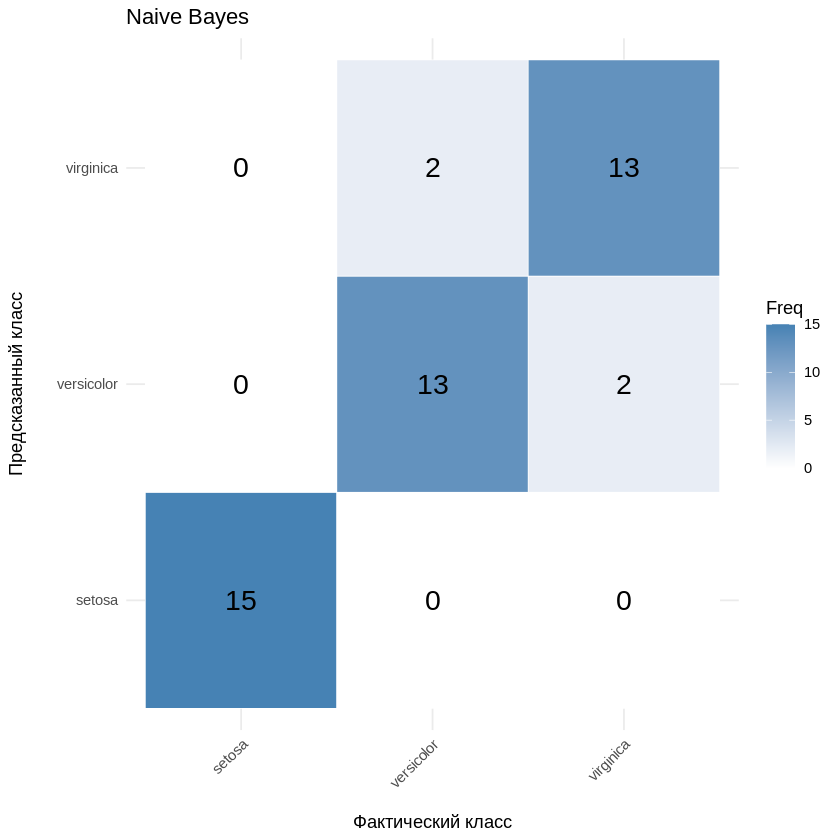

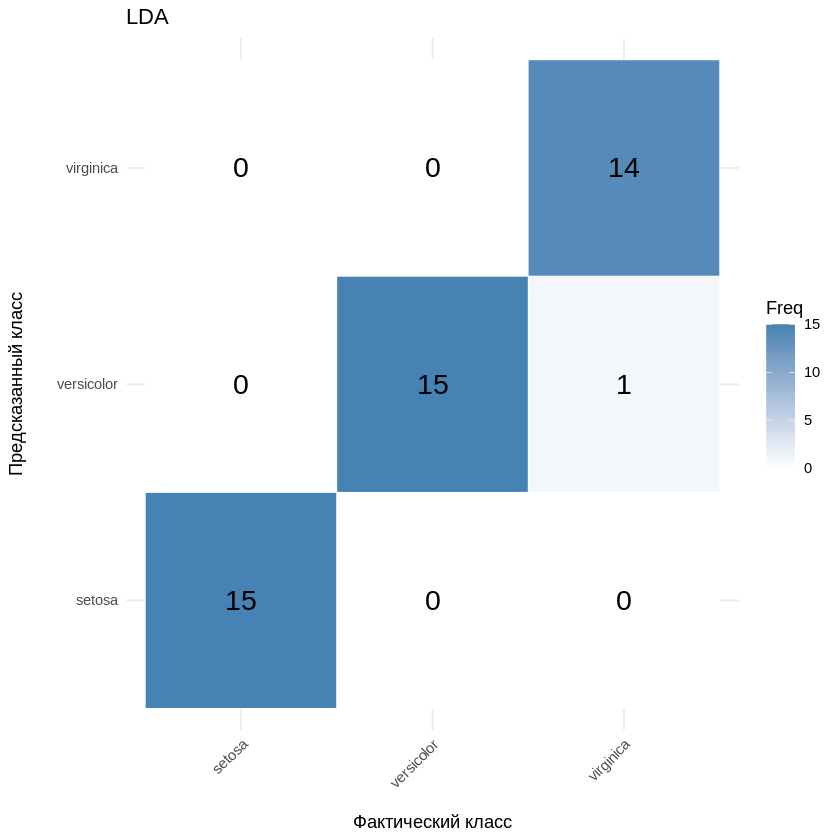

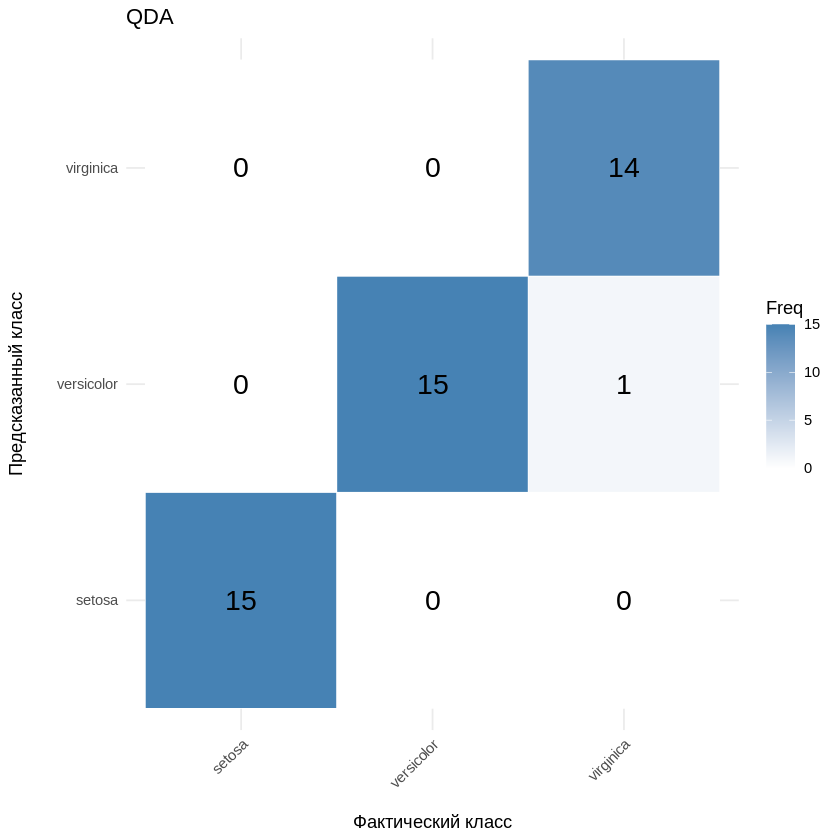

Too few points to calculate an ellipse
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_path()`).”


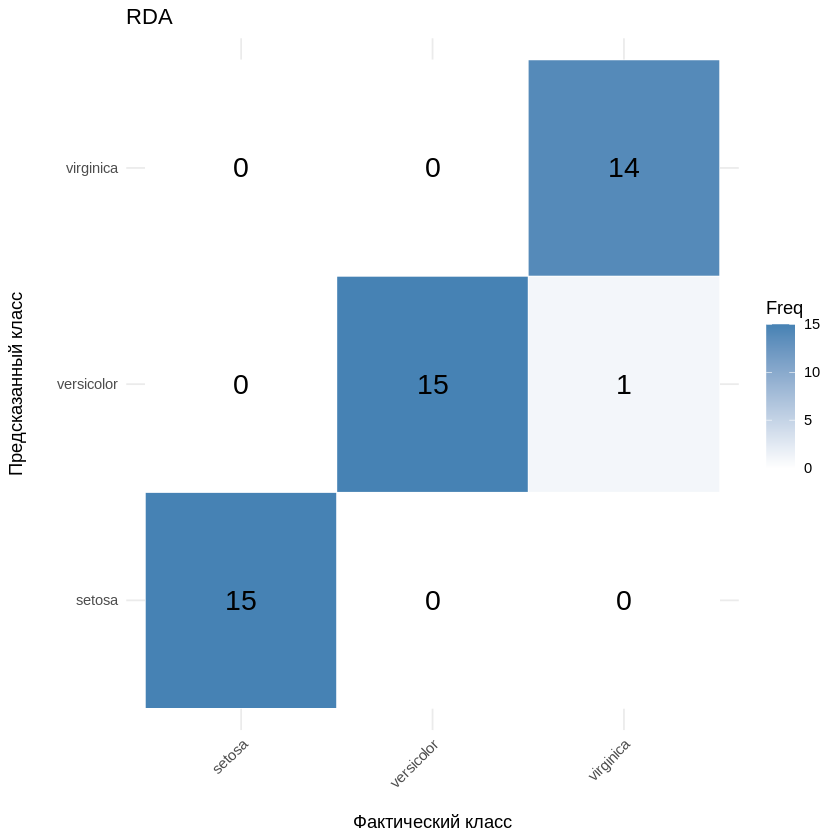

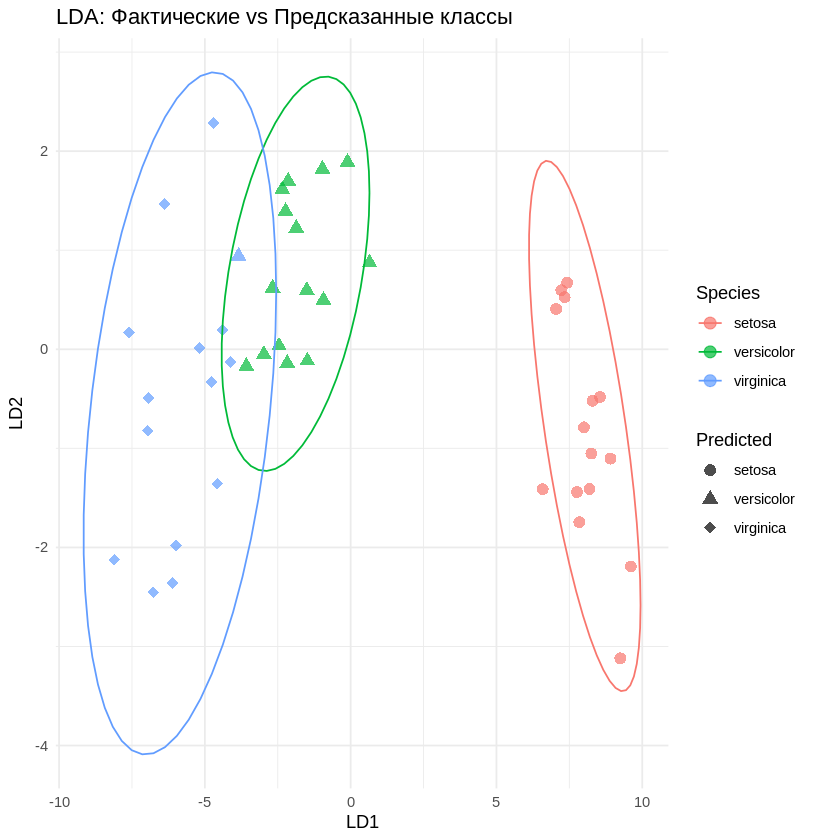

In [9]:
cat("\n=== СРАВНИТЕЛЬНЫЙ АНАЛИЗ МОДЕЛЕЙ ===\n")

# Создание сводной таблицы результатов
results <- data.frame(
  Модель = c("Naive Bayes", "LDA", "QDA", "RDA"),
  Точность = c(nb_accuracy, lda_accuracy, qda_accuracy, rda_accuracy),
  Ошибок = c(
    sum(nb_confusion_matrix) - sum(diag(nb_confusion_matrix)),
    sum(lda_confusion_matrix) - sum(diag(lda_confusion_matrix)),
    sum(qda_confusion_matrix) - sum(diag(qda_confusion_matrix)),
    sum(rda_confusion_matrix) - sum(diag(rda_confusion_matrix))
  )
)

print(results)


# Функция для создания матриц ошибок
create_confusion_matrix_plot <- function(conf_matrix, title) {
  conf_df <- as.data.frame(conf_matrix)
  ggplot(conf_df, aes(x = Факт, y = Прогноз, fill = Freq)) +
    geom_tile(color = "white") +
    geom_text(aes(label = Freq), color = "black", size = 6) +
    scale_fill_gradient(low = "white", high = "steelblue") +
    labs(title = title, x = "Фактический класс", y = "Предсказанный класс") +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))
}

# Создание графиков матриц ошибок
p1 <- create_confusion_matrix_plot(nb_confusion_matrix, "Naive Bayes")
p2 <- create_confusion_matrix_plot(lda_confusion_matrix, "LDA")
p3 <- create_confusion_matrix_plot(qda_confusion_matrix, "QDA")
p4 <- create_confusion_matrix_plot(rda_confusion_matrix, "RDA")

# Вывод графиков
print(p1)
print(p2)
print(p3)
print(p4)

# Визуализация разделяющих поверхностей LDA
plot_lda_results <- function() {
  # Преобразование данных с помощью LDA
  lda_plot_data <- data.frame(
    LD1 = lda_scores[, 1],
    LD2 = lda_scores[, 2],
    Species = test_data$Species,
    Predicted = lda_predictions
  )

  ggplot(lda_plot_data, aes(x = LD1, y = LD2, color = Species, shape = Predicted)) +
    geom_point(size = 3, alpha = 0.7) +
    scale_shape_manual(values = c(16, 17, 18)) +
    labs(title = "LDA: Фактические vs Предсказанные классы",
         x = "LD1", y = "LD2") +
    theme_minimal() +
    stat_ellipse(level = 0.95)  # Добавляем эллипсы доверия
}

print(plot_lda_results())


In [10]:
# Функция для расчета дополнительных метрик
calculate_metrics <- function(conf_matrix) {
  accuracy <- sum(diag(conf_matrix)) / sum(conf_matrix)

  # Precision, Recall, F1 для каждого класса
  metrics <- data.frame()
  for(i in 1:nrow(conf_matrix)) {
    tp <- conf_matrix[i, i]
    fp <- sum(conf_matrix[, i]) - tp
    fn <- sum(conf_matrix[i, ]) - tp
    tn <- sum(conf_matrix) - tp - fp - fn

    precision <- ifelse((tp + fp) > 0, tp / (tp + fp), 0)
    recall <- ifelse((tp + fn) > 0, tp / (tp + fn), 0)
    f1 <- ifelse((precision + recall) > 0, 2 * precision * recall / (precision + recall), 0)

    metrics <- rbind(metrics, data.frame(
      Class = rownames(conf_matrix)[i],
      Precision = precision,
      Recall = recall,
      F1 = f1
    ))
  }

  return(list(accuracy = accuracy, metrics = metrics))
}

# Расчет метрик для всех моделей
cat("\n=== ДЕТАЛЬНЫЕ МЕТРИКИ КАЧЕСТВА ===\n")

nb_metrics <- calculate_metrics(nb_confusion_matrix)
cat("Naive Bayes - Общая точность:", round(nb_metrics$accuracy, 4), "\n")
print(nb_metrics$metrics)

lda_metrics <- calculate_metrics(lda_confusion_matrix)
cat("\nLDA - Общая точность:", round(lda_metrics$accuracy, 4), "\n")
print(lda_metrics$metrics)

qda_metrics <- calculate_metrics(qda_confusion_matrix)
cat("\nQDA - Общая точность:", round(qda_metrics$accuracy, 4), "\n")
print(qda_metrics$metrics)


=== ДЕТАЛЬНЫЕ МЕТРИКИ КАЧЕСТВА ===
Naive Bayes - Общая точность: 0.9111 
       Class Precision    Recall        F1
1     setosa 1.0000000 1.0000000 1.0000000
2 versicolor 0.8666667 0.8666667 0.8666667
3  virginica 0.8666667 0.8666667 0.8666667

LDA - Общая точность: 0.9778 
       Class Precision    Recall        F1
1     setosa    1.0000 1.0000000 1.0000000
2 versicolor    0.9375 1.0000000 0.9677419
3  virginica    1.0000 0.9333333 0.9655172

QDA - Общая точность: 0.9778 
       Class Precision    Recall        F1
1     setosa    1.0000 1.0000000 1.0000000
2 versicolor    0.9375 1.0000000 0.9677419
3  virginica    1.0000 0.9333333 0.9655172


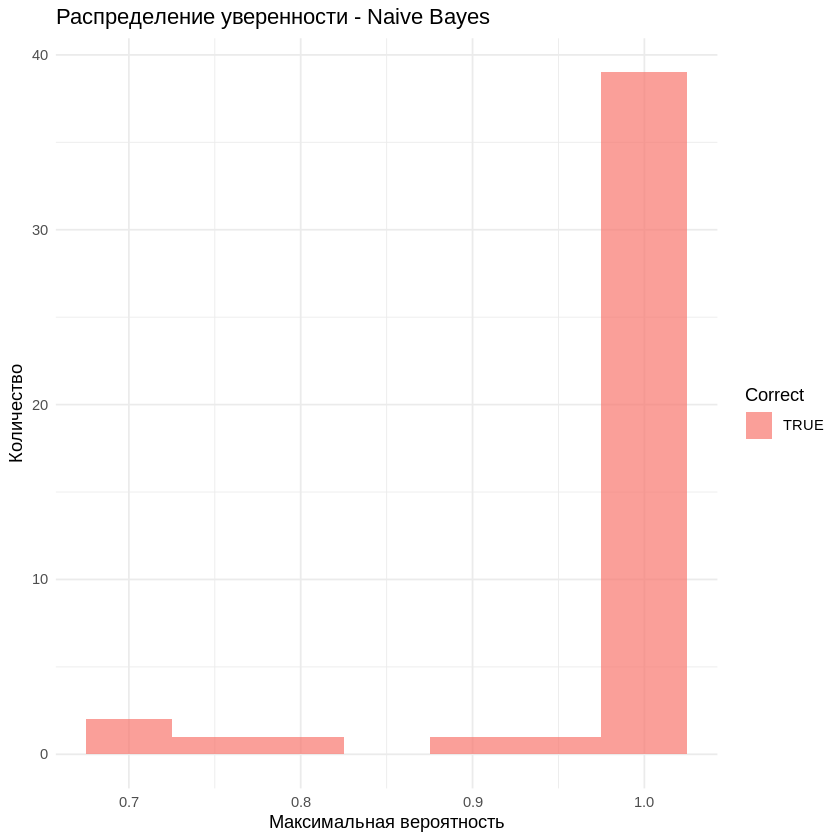

In [12]:
# Функция для анализа уверенности моделей
analyze_confidence <- function(probabilities, true_classes, model_name) {
  max_probs <- apply(probabilities, 1, max)
  correct_predictions <- (true_classes == true_classes)

  confidence_df <- data.frame(
    MaxProbability = max_probs,
    Correct = correct_predictions
  )

  ggplot(confidence_df, aes(x = MaxProbability, fill = Correct)) +
    geom_histogram(binwidth = 0.05, alpha = 0.7, position = "identity") +
    labs(title = paste("Распределение уверенности -", model_name),
         x = "Максимальная вероятность", y = "Количество") +
    theme_minimal()
}

# Анализ уверенности для LDA (пример)
print(analyze_confidence(lda_probabilities, test_data$Species, "Naive Bayes"))





In [14]:
cat("\n=== ВЫВОДЫ И РЕКОМЕНДАЦИИ ===\n")

# Определение лучшей модели
best_model <- results$Модель[which.max(results$Точность)]
cat("Лучшая модель по точности:", best_model, "\n")



# Функция для предсказания на новых данных
predict_new_data <- function(model, new_data, model_type = "lda") {
  if(model_type == "naive_bayes") {
    return(predict(model, new_data))
  } else if(model_type %in% c("lda", "qda", "rda")) {
    return(predict(model, new_data)$class)
  }
}

# Пример использования функции предсказания
cat("\nПример предсказания для первых 3 строк тестовых данных:\n")
example_predictions <- predict_new_data(lda_model, test_data[1:3, ], "lda")
print(example_predictions)
cat("Фактические значения:\n")
print(test_data$Species[1:3])


=== ВЫВОДЫ И РЕКОМЕНДАЦИИ ===
Лучшая модель по точности: LDA 

Пример предсказания для первых 3 строк тестовых данных:
[1] setosa setosa setosa
Levels: setosa versicolor virginica
Фактические значения:
[1] setosa setosa setosa
Levels: setosa versicolor virginica
